## Modeling Continued

In [ ]:
# Mount google drive to notebook to pull pickle files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import time, scipy
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Activation, Conv2D
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import pickle
import keras

# Import 'helpers.py' file
from google.colab import files
src = list(files.upload().values())[0]
open('helpers.py','wb').write(src)
import helpers as hp

Saving helpers.py to helpers.py


In [ ]:
# Open Pickle files containing train and test data
infile = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X.pickle','rb')
X = pickle.load(infile)

infile2 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y.pickle','rb')
y = pickle.load(infile2)

infile3 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_test.pickle','rb')
X_test = pickle.load(infile3)

infile4 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_test.pickle','rb')
y_test = pickle.load(infile4)

In [ ]:
# Data Augmentation with horizonatal and vertical flips
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

### Model 1

In [ ]:
model = Sequential([ # Model steps are performed one after another rather than at the same time
  data_augmentation,
  layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=X.shape[1:]),
  layers.MaxPooling2D(pool_size=2, strides=2)
])

model.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=1))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=1))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) # First hidden layer
model.add(layers.Dense(72, activation='relu')) # Second hidden layer
model.add(layers.Dense(64, activation='relu')) # Third hidden layer
model.add(layers.Dense(30, activation='relu')) # Fourth hidden layer
model.add(layers.Dense(8, activation='relu')) # Fifth hidden layer
model.add(layers.Dense(3, activation='softmax')) # Sixth hidden layer

# Compile and train CNN
opt = SGD(learning_rate=0.05) 
model.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = opt,
               metrics=['accuracy'])

# Fit and score model performance
model_score = model.fit(X,
                        y,
                        epochs=10,
                        validation_split=0.2)

Epoch 1/10
1618/1618 [==============================] - 679s 419ms/step - loss: 0.9431 - accuracy: 0.5609 - val_loss: 0.8678 - val_accuracy: 0.6215
Epoch 2/10
1618/1618 [==============================] - 672s 415ms/step - loss: 0.8902 - accuracy: 0.6058 - val_loss: 0.8561 - val_accuracy: 0.6369
Epoch 3/10
1618/1618 [==============================] - 673s 416ms/step - loss: 0.8394 - accuracy: 0.6377 - val_loss: 0.8083 - val_accuracy: 0.6526
Epoch 4/10
1618/1618 [==============================] - 675s 417ms/step - loss: 0.8029 - accuracy: 0.6598 - val_loss: 0.7617 - val_accuracy: 0.6759
Epoch 5/10
1618/1618 [==============================] - 682s 422ms/step - loss: 0.7647 - accuracy: 0.6840 - val_loss: 0.7509 - val_accuracy: 0.6911
Epoch 6/10
1618/1618 [==============================] - 690s 426ms/step - loss: 0.7384 - accuracy: 0.6934 - val_loss: 0.7654 - val_accuracy: 0.6818
Epoch 7/10
1618/1618 [==============================] - 679s 420ms/step - loss: 0.7090 - accuracy: 0.7078 - val_

In [ ]:
model.evaluate(X_test, y_test)

578/578 [==============================] - 45s 77ms/step - loss: 0.7306 - accuracy: 0.6976


[0.7306464910507202, 0.6975812911987305]

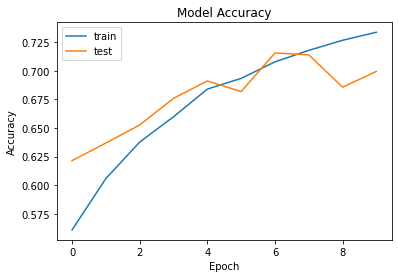

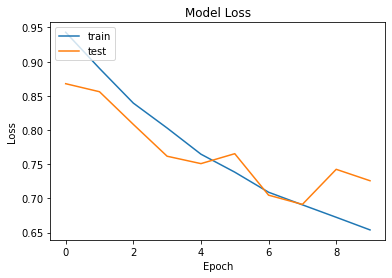

In [ ]:
hp.plot_model_train_val_accuracy_loss(model_score)

### Model Analysis
Less MaxPooling and Conv2D with more Dense layers from previous models. Accuracy has increased marginally. More epochs will be required to better gauge the effect of these changes.